In [74]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
x = load_boston().data
y = load_boston().target

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [4]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)

In [6]:
clf = SGDRegressor()
clf.fit(x_train,y_train)
print('The root means squared error of sklearn implementation is ', mean_squared_error(y_train, clf.predict(x_train)))

The root means squared error of sklearn implementation is  23.646524246765292


In [7]:
sklearn_coef = clf.coef_

# Custom implementation

#### converting to matrix

In [8]:
x_train = np.asmatrix(x_train)

In [9]:
# y = np.asmatrix(y)

In [10]:
y_train=y_train.reshape(354,1)

#### Finding weights and biases

In [11]:
alpha=0.01
num_iterations = 1000
current_w = np.random.normal(size=([13,1]))
current_w = current_w.transpose()
current_b = np.random.normal()
optimal_w=[]
optimal_b=[]
N=x_train.shape[0]
num_iterations=10000
totalcost=[]

for i in range(1,num_iterations+1):
    indices = np.random.choice(len(x_train), 1, replace=False)
    cost = ((y_train[indices]) - (np.dot((current_w.transpose()),x_train[indices])-current_b))/2*N
    totalcost.append(cost)
    dl_dw = sum((-2*(x_train[indices]) * cost)/N)
    dl_db = sum((-2) * sum((cost))/N)
    next_w = current_w - (alpha*dl_dw)
    next_b = current_b - (alpha*dl_db)
    alpha/=2
    optimal_w.append(next_w)
    optimal_b.append(next_b)
    if (current_w-next_w).all()<0.0001:
        if (current_b-next_b).all()<0.0001:
            optimal_w = next_w
            optimal_b = next_b.sum()
            print('optimal w and b found after {} iterations'.format(i))
            break
    else:
        current_w = next_w
        current_b = next_b

optimal w and b found after 54 iterations


In [12]:
optimal_w

matrix([[-0.05863614, -0.24877027,  0.13994501,  1.31376442,  1.31936717,
         -0.06215083, -0.63426967,  1.07196977,  0.61977118,  0.44133681,
          0.26349653,  0.96537464, -0.02071694]])

In [13]:
optimal_b

55.10690607182861

In [14]:
totalerror=0
for i in range(0, len(x_train)):
    error = (y_train[i] - ((x_train[i])*(current_w.T)))**2
    totalerror += error
print('The root means square error of my implementation is ',np.sqrt(totalerror/len(x)))

The root means square error of my implementation is  [[20.90958968]]


# Predictions on Custom implementation

In [16]:
x_test.shape

(152, 13)

In [17]:
arr_x_test = np.asarray(x_test)

In [18]:
arr_x_test.shape

(152, 13)

In [19]:
arr_x_test.reshape(-1,1)

array([[9.1780e-02],
       [0.0000e+00],
       [4.0500e+00],
       ...,
       [2.0200e+01],
       [3.8852e+02],
       [1.6440e+01]])

In [37]:
x_test[0][:, np.newaxis].shape

(13, 1)

In [40]:
optimal_w.shape

(1, 13)

In [41]:
def custom_pred():
    y_pred = []
    for i in x_test:
        val = i[:, np.newaxis]
        y_pred.append(optimal_b + np.dot(optimal_w, i))
    return y_pred

In [42]:
y_pred = custom_pred()

In [44]:
y_test_pred = np.asarray(y_pred)

In [47]:
y_test_pred = y_test_pred.squeeze()

# All Plots for y_test vs y_test_pred for both CUSTOM AND SKLEARN

In [80]:
a = y_test[:, np.newaxis]

In [105]:
df = pd.DataFrame(data=a,columns=['y_test'])

In [106]:
df['y_test_pred'] = y_test_pred

Text(0.5,1,'Y_TEST VS Y_TEST_PRED FOR CUSTOM IMPLEMENTATION')

<Figure size 432x288 with 0 Axes>

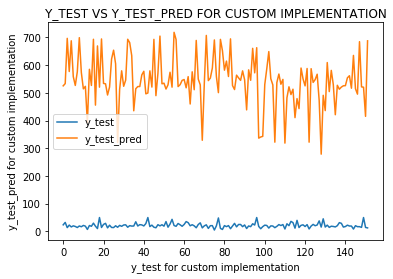

In [107]:
plt.figure()
df.plot()
plt.xlabel('y_test for custom implementation')
plt.ylabel('y_test_pred for custom implementation')
plt.title('Y_TEST VS Y_TEST_PRED FOR CUSTOM IMPLEMENTATION')

### sklearn's y_test_pred vs y_test

In [96]:
sklearn_y_test_pred = clf.predict(x_test)

In [98]:
sklearn_y_test_pred.shape

(152,)

In [108]:
df = pd.DataFrame(data=y_test, columns=['y_test'])

In [109]:
df['sklearn_y_test_pred'] = sklearn_y_test_pred

Text(0.5,1,'Y_TEST VS Y_TEST_PRED FOR Sklearn IMPLEMENTATION')

<Figure size 432x288 with 0 Axes>

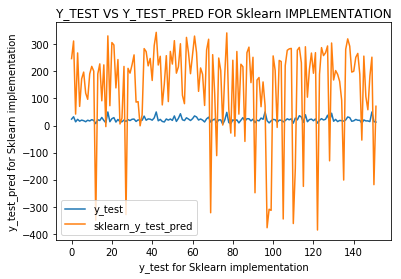

In [110]:
plt.figure()
df.plot()
plt.xlabel('y_test for Sklearn implementation')
plt.ylabel('y_test_pred for Sklearn implementation')
plt.title('Y_TEST VS Y_TEST_PRED FOR Sklearn IMPLEMENTATION')

# Residual plot of Custom implementation

In [238]:
residual = y_pred - y_test

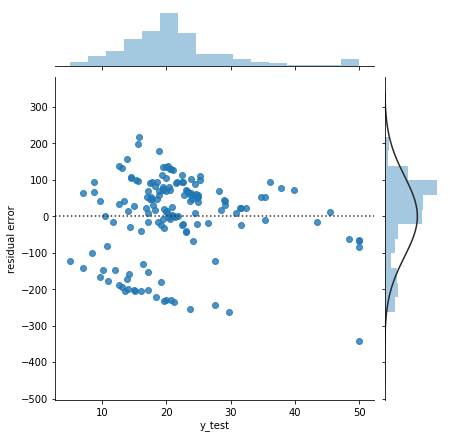

In [239]:
(seaborn.jointplot(y_test, residual, kind='resid').set_axis_labels("y_test", "residual error"))

# Residual plot of Sklearn's implementation

In [327]:
sklearn_y_pred = clf.predict(x_test)

In [241]:
residual = sklearn_y_pred - y_test

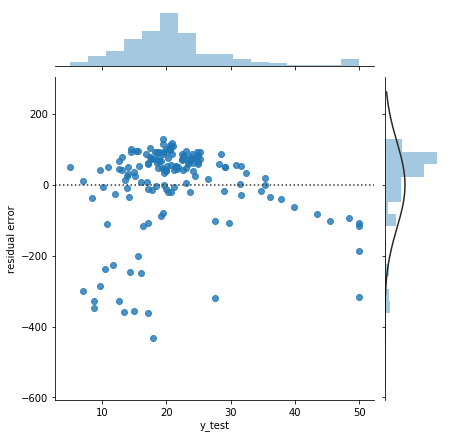

In [242]:
(seaborn.jointplot(y_test, residual, kind='resid').set_axis_labels("y_test", "residual error"))

### predicted and test value plots

# custom implementation

In [186]:
bins = np.linspace(0,152,152)

In [177]:
arr_y_test = np.asarray(y_test)
arr_y_pred = np.asarray(y_pred)

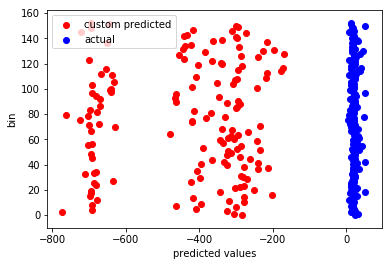

In [193]:
plt.scatter(arr_y_pred, bins,c = 'r', label='custom predicted')
plt.scatter(arr_y_test, bins, c='b', label='actual')
plt.xlabel('predicted values')
plt.ylabel('bin')
plt.legend()

# Sklearn implementation

In [191]:
arr_y_test = np.asarray(y_test)
arr_sklearn_y_pred = np.asarray(sklearn_y_pred)

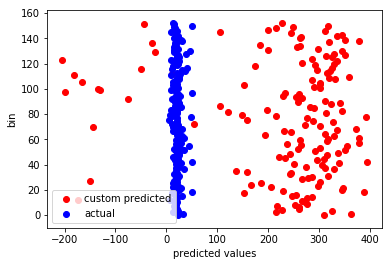

In [194]:
plt.scatter(arr_sklearn_y_pred, bins,c = 'r', label='custom predicted')
plt.scatter(arr_y_test, bins, c='b', label='actual')
plt.xlabel('predicted values')
plt.ylabel('bin')
plt.legend()

### Distributions comparing both implementations

In [287]:
bins = np.linspace(1,20,1)

In [270]:
y_sample = np.arange(1,153)

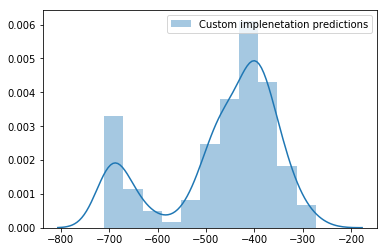

In [286]:
seaborn.distplot(y_pred, label=['Custom implenetation predictions'])
plt.legend()

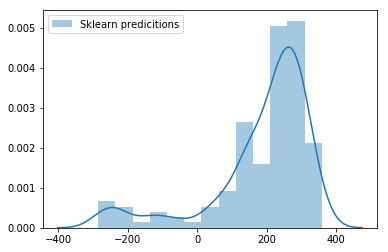

In [277]:
seaborn.distplot(sklearn_y_pred,label=['Sklearn predicitions'])
plt.legend()

In [296]:
import sklearn.metrics
from sklearn.metrics import accuracy_score

### Table comparing weights

In [248]:
x = new_sklearn_weights[:, np.newaxis]

In [249]:
y = current_weights[:, np.newaxis]

In [250]:
z = np.hstack((x,y))

In [251]:
df = pd.DataFrame(data=z, columns=['sklearn_weights','custom_implementaion weigts'])

In [252]:
df

,sklearn_weights,custom_implementaion weigts
0,-0.813956,0.653434
1,0.379613,-0.733890
2,-0.189390,-0.495114
3,1.017991,-0.109274
4,-0.811667,-2.142707
5,3.324155,-1.109878
6,-0.259395,-0.094890
7,-1.888310,-1.646406
8,0.563912,-1.582827
9,-0.231349,-0.761266
